In [57]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import json
import matplotlib.pyplot as plt

In [58]:
model=models.vgg16(pretrained=True)
model.eval()

/home/workstation-p/anaconda3/envs/conda-env-3-12/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/workstation-p/anaconda3/envs/conda-env-3-12/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [59]:
import requests
LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response = requests.get(LABELS_URL)
class_names = [line.strip() for line in response.text.splitlines()]

In [60]:

transform=transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
    ]
)

In [61]:
def preprocess_image(image_path):
    image=Image.open(image_path).convert("RGB")
    image=transform(image)
    image=image.unsqueeze(0)
    return image

### Model Inferencing

In [62]:
def infer(image_path):
    image=preprocess_image(image_path)
    with torch.no_grad():
        output=model(image)
    probabilities=torch.nn.functional.softmax(output[0],dim=0)
    top5_prob,top5_catid=probabilities.topk(5)
    results=[(class_names[catid],prob.item()) for catid,prob in zip(top5_catid,top5_prob)]
    return results

In [63]:
def show_image(image_path):
    image=Image.open(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

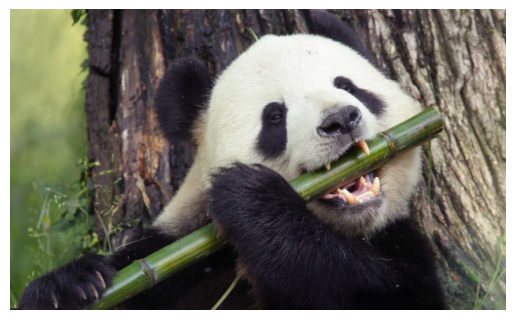

giant panda:1.0000
badger:0.0000
sloth bear:0.0000
lesser panda:0.0000
American black bear:0.0000


In [64]:
image_path="../Computer_Vision/Open_CV/Images/Pandas.png"
show_image(image_path)
results=infer(image_path)
for label,prob in results:
    print(f"{label}:{prob:.4f}")